<a href="https://colab.research.google.com/github/joshuadollison/MAT421/blob/main/MAT421_16133_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 5**
Joshua Dollison

MAT421-16133

2/16/2025


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import scipy.fftpack as fftpack

# **1.1: Introduction**

The class text states that Linear algebra is a field of mathematics that is widely used in various disciplines.  Linear algebra is foundational in data science and engineering. In this section, we demonstrate fundamental vector and matrix operations.

### 1.1.1 Example 1: Basic Vector and Matrix Operations

This example shows vector addition, scalar multiplication, and plots the vectors.

Vector Addition: [5 7]
Scalar Multiplication (3*v1): [3 6]
Dot Product: 14


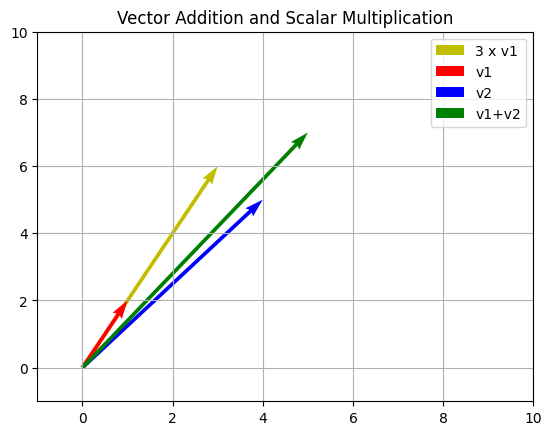

In [2]:
# Define two 2D vectors
v1 = np.array([1, 2])
v2 = np.array([4, 5])

# Vector addition
addition = v1 + v2
print('Vector Addition:', addition)

# Scalar multiplication
scalar_mult = 3 * v1
print('Scalar Multiplication (3*v1):', scalar_mult)

# Dot product (vector multiplication)
dot_product = np.dot(v1, v2)
print('Dot Product:', dot_product)

# Plot the original vectors and their sum
fig, ax = plt.subplots()
ax.quiver(0, 0, scalar_mult[0], scalar_mult[1], angles='xy', scale_units='xy', scale=1, color='y', label='3 x v1')
ax.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r', label='v1')
ax.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='b', label='v2')
ax.quiver(0, 0, addition[0], addition[1], angles='xy', scale_units='xy', scale=1, color='g', label='v1+v2')
ax.set_xlim(-1, 10)
ax.set_ylim(-1, 10)
ax.set_title('Vector Addition and Scalar Multiplication')
ax.legend()
plt.grid()
plt.show()


### 1.1.2 Example 2: 3D Transformations in Computer Graphics

This example rotates a 2D point (projected from a 3D point) using a rotation matrix. This is essential in graphics applications.

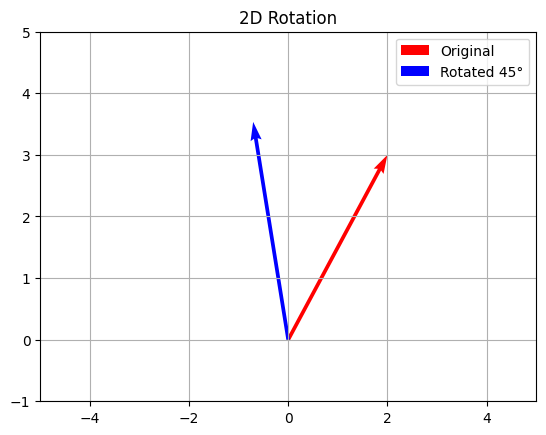

In [3]:
def rotate_point(point, angle):
    theta = np.radians(angle)
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                                 [np.sin(theta), np.cos(theta)]])
    return np.dot(rotation_matrix, point)

# Original point
point = np.array([2, 3])

# Rotate by 45 degrees
rotated_point = rotate_point(point, 45)

# Plot the original and rotated points
fig, ax = plt.subplots()
ax.quiver(0, 0, point[0], point[1], angles='xy', scale_units='xy', scale=1, color='r', label='Original')
ax.quiver(0, 0, rotated_point[0], rotated_point[1], angles='xy', scale_units='xy', scale=1, color='b', label='Rotated 45°')
ax.set_xlim(-5, 5)
ax.set_ylim(-1, 5)
ax.set_title('2D Rotation')
ax.legend()
plt.grid()
plt.show()

# **1.2: Elements of Linear Algebra**

This section covers vector spaces, linear combinations, independence, orthonormal bases, and more.

### 1.2.1 Linear Combinations

The class text states that a linear combination in linear algebra is a new vector constructed from a subset by multiplying each vector by a constant and adding the results. A linear subspace is a result of linear combination.

#### 1.2.1.1 Example 1: Basic Linear Combination

This example computes a linear combination of two vectors and plots the result.

Linear Combination: [0 5]


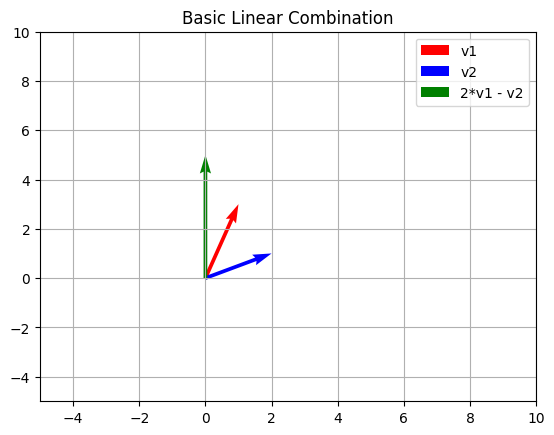

In [4]:
# Define vectors
v1 = np.array([1, 3])
v2 = np.array([2, 1])

# Define scalars
a, b = 2, -1

# Compute linear combination
combination = a*v1 + b*v2
print('Linear Combination:', combination)

# Plot the vectors and their combination
fig, ax = plt.subplots()
ax.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r', label='v1')
ax.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='b', label='v2')
ax.quiver(0, 0, combination[0], combination[1], angles='xy', scale_units='xy', scale=1, color='g', label='2*v1 - v2')
ax.set_xlim(-5, 10)
ax.set_ylim(-5, 10)
ax.set_title('Basic Linear Combination')
ax.legend()
plt.grid()
plt.show()

#### 1.2.1.2 Example 2: Portfolio Weighting

This GPT inspired,  real-world example uses matrix manipulations and linear algebra techniques to simulate portfolio weighting. It computes the covariance matrix, inverts this matrix, and then implements the formula for minimum variance portfolio weights, which is a typical use case of linear algebra in finance.

Covariance Matrix:
[[ 1.18362543 -0.07935745  0.13617526  0.07584143]
 [-0.07935745  0.95515849  0.17818152  0.05314995]
 [ 0.13617526  0.17818152  0.80104545  0.01782341]
 [ 0.07584143  0.05314995  0.01782341  0.94670617]]
Minimum Variance Portfolio Weights:
[0.21390551 0.25643436 0.26109618 0.26856394]


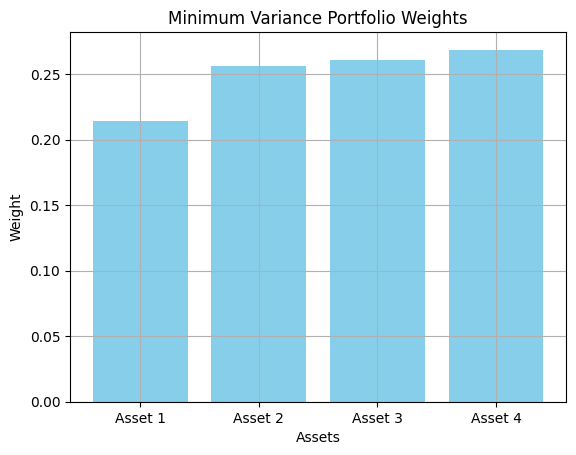

In [5]:
# Simulate returns for 4 assets over 100 periods
np.random.seed(0)
returns = np.random.randn(100, 4)

# Compute the covariance matrix (each column is an asset)
cov_matrix = np.cov(returns, rowvar=False)
print("Covariance Matrix:")
print(cov_matrix)

# Create a column vector of ones for 4 assets
ones = np.ones((4, 1))

# Compute the inverse of the covariance matrix
inv_cov = np.linalg.inv(cov_matrix)

# Compute the minimum variance portfolio weights:
# w = inv_cov * ones / (ones.T * inv_cov * ones)
w = inv_cov.dot(ones) / (ones.T.dot(inv_cov).dot(ones))
w = w.flatten()

print("Minimum Variance Portfolio Weights:")
print(w)

# Plot the computed portfolio weights as a bar chart
assets = ['Asset 1', 'Asset 2', 'Asset 3', 'Asset 4']
plt.bar(assets, w, color='skyblue')
plt.xlabel('Assets')
plt.ylabel('Weight')
plt.title('Minimum Variance Portfolio Weights')
plt.grid(True)
plt.show()


### 1.2.2 Linear Independence and Dimension

The class text states that A list of vectors $u_1, ..., u_m$ is linearly
independent if none of them can be written as a linear combination of the
others. A list of vectors is called linearly dependent if it is not linearly independent. Determining if a set of vectors is linearly independent helps in understanding the dimension of a space.

#### 1.2.2.1 Example 1: Checking Linear Independence

This example plots the span of one vector (as a line) and shows a second vector that does not lie on that line. This clearly demonstrates that the two vectors are linearly independent. The code also computes the determinant (which will be nonzero) as a numerical check.

Determinant (non-zero indicates independence): -5.000000000000001


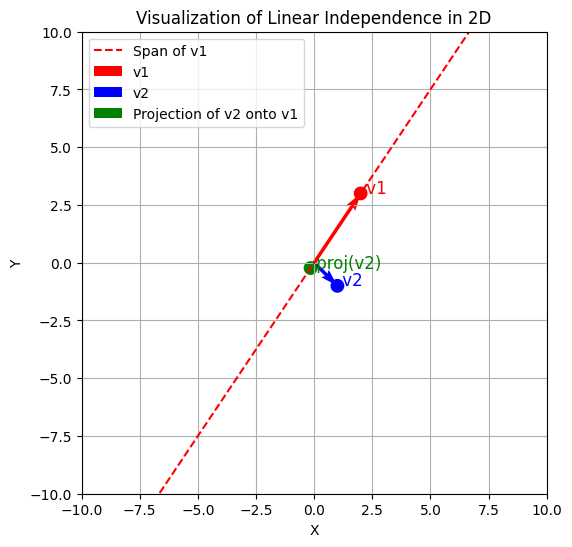

In [6]:
# Define two 2D vectors that are not multiples of each other
v1 = np.array([2, 3])
v2 = np.array([1, -1])

# Check independence: In 2D, if the determinant of [v1 v2] is non-zero, they are independent.
det_val = np.linalg.det(np.column_stack((v1, v2)))
print("Determinant (non-zero indicates independence):", det_val)

# Compute the span of v1: create a set of points along the line through the origin in the direction of v1.
t = np.linspace(-5, 5, 100)
span_v1 = np.outer(t, v1)  # Each row is a point on the line spanned by v1

# Compute the projection of v2 onto v1
proj_v2_on_v1 = (np.dot(v2, v1) / np.dot(v1, v1)) * v1

# Plot the span of v1 as a dashed line
plt.figure(figsize=(6,6))
plt.plot(span_v1[:, 0], span_v1[:, 1], 'r--', label="Span of v1")

# Plot the vector v1
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r', label="v1")

# Plot the vector v2
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='b', label="v2")

# Plot the projection of v2 onto v1 (in green)
plt.quiver(0, 0, proj_v2_on_v1[0], proj_v2_on_v1[1], angles='xy', scale_units='xy', scale=1, color='g', label="Projection of v2 onto v1")

# Annotate the points for clarity
plt.scatter([v1[0], v2[0], proj_v2_on_v1[0]], [v1[1], v2[1], proj_v2_on_v1[1]], color=['r','b','g'], s=80)
plt.text(v1[0], v1[1], " v1", color='r', fontsize=12)
plt.text(v2[0], v2[1], " v2", color='b', fontsize=12)
plt.text(proj_v2_on_v1[0], proj_v2_on_v1[1], " proj(v2)", color='g', fontsize=12)

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Visualization of Linear Independence in 2D")
plt.legend()
plt.grid(True)
plt.show()


#### 1.2.2.2 Example 2: Linear Independence and Dimension

In this GPT inspired example, we simulate sensor readings (for example, from a factory setting) for three independent sensors measuring different physical phenomena. We then compute the rank of the sensor data matrix to verify that the signals are independent and plot the sensor signals over time.  This example demonstrates a practical application of linear independence and dimension by showing how independent sensor signals can be confirmed using linear algebra. Let me know if this meets your needs.

Rank of sensor data matrix: 3


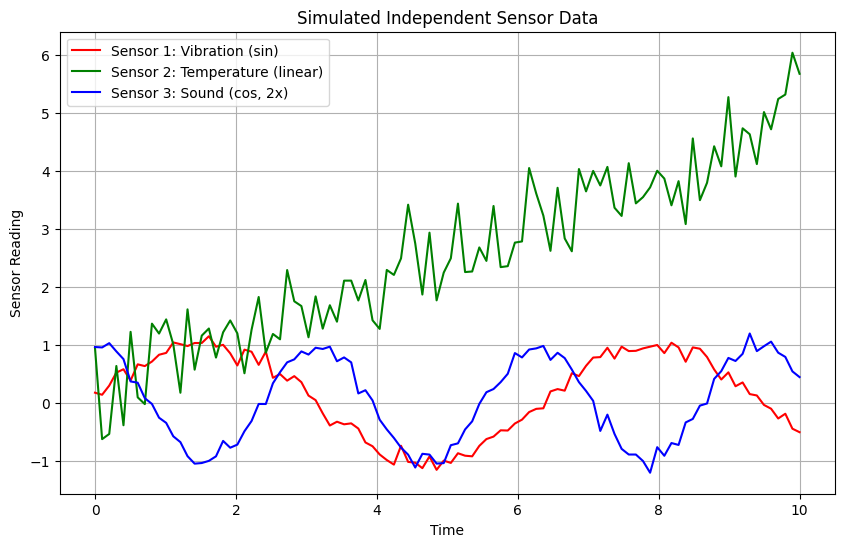

In [7]:
# Simulate time points
np.random.seed(0)
time = np.linspace(0, 10, 100)

# Simulate sensor data:
# Sensor 1: Vibration (sinusoidal with noise)
sensor1 = np.sin(time) + 0.1 * np.random.randn(100)

# Sensor 2: Temperature (linear trend with noise)
sensor2 = 0.5 * time + 0.5 * np.random.randn(100)

# Sensor 3: Sound intensity (cosine with a different frequency and noise)
sensor3 = np.cos(2 * time) + 0.1 * np.random.randn(100)

# Stack the sensor data into a matrix (each column is one sensor's data)
data = np.column_stack((sensor1, sensor2, sensor3))

# Compute the rank of the data matrix. A rank of 3 indicates the signals are linearly independent.
rank_data = np.linalg.matrix_rank(data)
print("Rank of sensor data matrix:", rank_data)

# Plot the sensor readings over time
plt.figure(figsize=(10, 6))
plt.plot(time, sensor1, label="Sensor 1: Vibration (sin)", color='r')
plt.plot(time, sensor2, label="Sensor 2: Temperature (linear)", color='g')
plt.plot(time, sensor3, label="Sensor 3: Sound (cos, 2x)", color='b')
plt.xlabel("Time")
plt.ylabel("Sensor Reading")
plt.title("Simulated Independent Sensor Data")
plt.legend()
plt.grid(True)
plt.show()


### 1.2.3 Orthonormal Bases
The book states that in many applications, the use of orthonormal bases can greatly simplify mathematical representations and reveal more insights of the underlying problems.  An orthonormal basis is a set of vectors that are both orthogonal and of unit length.

#### 1.2.3.1 Example 1: Constructing an Orthonormal Basis

In this example, we normalize a set of vectors and plot them to confirm they are unit vectors and orthogonal.

Orthonormal Basis: [array([0.9486833 , 0.31622777]), array([0.4472136 , 0.89442719])]


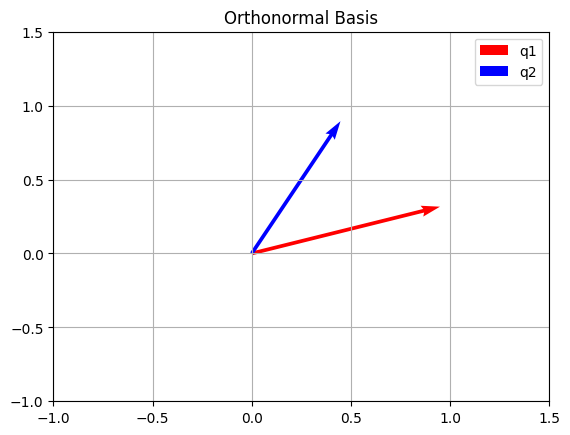

In [8]:
def normalize_vectors(vectors):
    return [v / np.linalg.norm(v) for v in vectors]

# Define vectors
u1 = np.array([3, 1])
u2 = np.array([1, 2])

orthonormal_basis = normalize_vectors([u1, u2])
print('Orthonormal Basis:', orthonormal_basis)

# Plot the basis vectors
fig, ax = plt.subplots()
colors = ['r', 'b']
labels = ['q1', 'q2']
for i, v in enumerate(orthonormal_basis):
    ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color=colors[i], label=labels[i])
ax.set_xlim(-1, 1.5)
ax.set_ylim(-1, 1.5)
ax.set_title('Orthonormal Basis')
ax.legend()
plt.grid()
plt.show()

#### 1.2.3.2 Example 2: Fourier Basis in Signal Processing

In this GPT inspired real-world example, we decompose a signal using sine and cosine functions (which form an orthonormal basis) and plot the frequency spectrum.

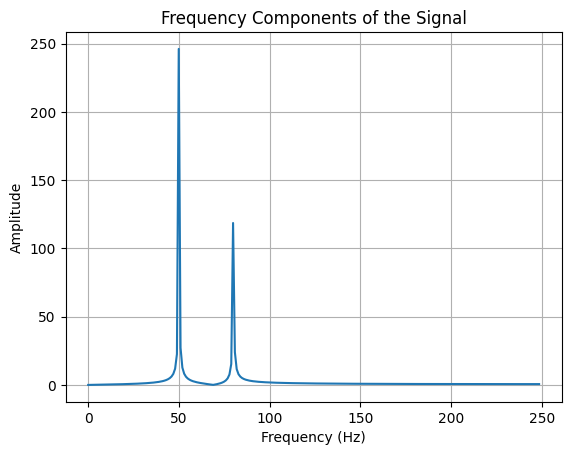

In [9]:
# Create a simple signal
t = np.linspace(0, 1, 500)
signal = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 80 * t)

# Compute Fourier Transform
signal_fft = fftpack.fft(signal)
freqs = fftpack.fftfreq(len(signal), d=t[1]-t[0])

# Plot the amplitude spectrum
plt.plot(freqs[:250], np.abs(signal_fft[:250]))
plt.title('Frequency Components of the Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

### 1.2.4 Best Approximation Theorem
The best approximation theorem shows that the projection of a vector onto a subspace minimizes the error.

#### 1.2.4.1 Example 1: Projection onto a Subspace
This example projects a vector onto a line and plot the original vector, its projection, and the error vector.

Projection of v onto u: [2. 4.]


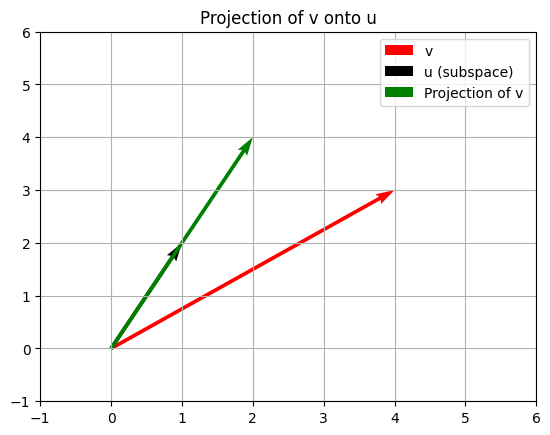

In [10]:
def project(v, u):
    # Project vector v onto u
    return (np.dot(v, u) / np.dot(u, u)) * u

v = np.array([4, 3])
u = np.array([1, 2])  # Direction of the subspace (line)
proj_v = project(v, u)

print('Projection of v onto u:', proj_v)

# Plot vectors
fig, ax = plt.subplots()
ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='r', label='v')
ax.quiver(0, 0, u[0], u[1], angles='xy', scale_units='xy', scale=1, color='k', label='u (subspace)')
ax.quiver(0, 0, proj_v[0], proj_v[1], angles='xy', scale_units='xy', scale=1, color='g', label='Projection of v')
ax.set_xlim(-1, 6)
ax.set_ylim(-1, 6)
ax.set_title('Projection of v onto u')
ax.legend()
plt.grid()
plt.show()

#### 1.2.4.2 Example 2: Least Squares Data Fitting

In this GPT inspired, real-world example, we fit a line to noisy data using least squares and plot the data, the fitted line, and residuals.

Fitted line: y = 1.72x + 2.69


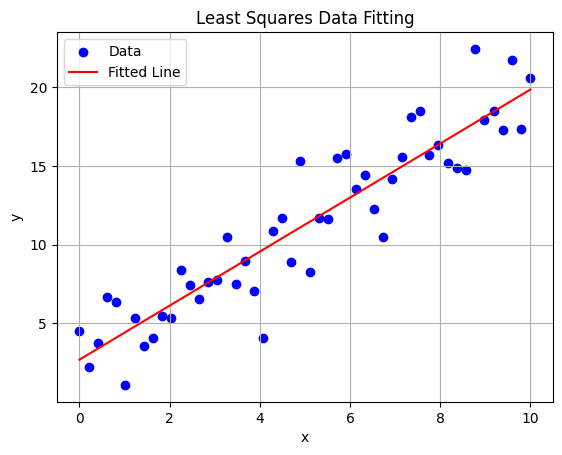

In [11]:
# Generate synthetic data
np.random.seed(0)
x_data = np.linspace(0, 10, 50)
y_data = 2 * x_data + 1 + np.random.randn(50) * 2

# Fit a line using least squares
A = np.vstack([x_data, np.ones(len(x_data))]).T
m, c = np.linalg.lstsq(A, y_data, rcond=None)[0]
print('Fitted line: y = {:.2f}x + {:.2f}'.format(m, c))

# Plot data and fitted line
plt.scatter(x_data, y_data, color='blue', label='Data')
plt.plot(x_data, m*x_data + c, color='red', label='Fitted Line')
plt.title('Least Squares Data Fitting')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

### 1.2.5 Gram-Schmidt Process

The class text states that the Gram-Schmidt algorithm is used to obtain an orthonormal basis from a set of linearly independent vectors.  The process takes advantage of the properties of orthogonal projection.  It works by adding vectors one by one, but only after taking out their orthogonal projection on the previously included vectors. The outcome spans the same subspace and orthogonal decomposition ensures orthogonality.

#### 1.2.5.1 Example 1: Basic Gram-Schmidt Process

In this example we apply the Gram-Schmidt process to a set of vectors and visualize the original versus orthonormalized vectors.

Orthonormal Basis: [[ 0.9486833   0.31622777]
 [-0.31622777  0.9486833 ]]


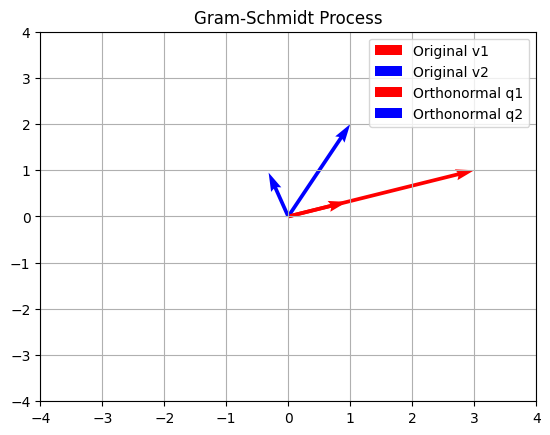

In [12]:
def gram_schmidt(vectors):
    ortho = []
    for v in vectors:
        for u in ortho:
            v = v - np.dot(u, v)/np.dot(u, u)*u
        ortho.append(v/np.linalg.norm(v))
    return np.array(ortho)

# Define a set of 2D vectors
vecs = [np.array([3, 1]), np.array([1, 2])]
ortho_basis = gram_schmidt(vecs)
print('Orthonormal Basis:', ortho_basis)

# Plot original and orthonormal vectors
fig, ax = plt.subplots()
colors = ['r', 'b']
for i, v in enumerate(vecs):
    #ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color=colors[i], linestyle='dashed', label=f'Original v{i+1}')
    ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color=colors[i], label=f'Original v{i+1}')

for i, v in enumerate(ortho_basis):
    ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color=colors[i], label=f'Orthonormal q{i+1}')
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_title('Gram-Schmidt Process')
ax.legend()
plt.grid()
plt.show()

### 1.2.6 Eigenvalues and Eigenvectors

Eigenvalues and eigenvectors are key concepts in many applications. Diagonalizing a symmetric matrix involves finding its eigenvalues and eigenvectors.

#### 1.2.6.1 Example 1: Eigenvalues and Eigenvectors

This example diagonalizez a symmetric matrix and plots its eigenvectors.

Eigenvalues: [4.61803399 2.38196601]
Eigenvectors:
 [[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]


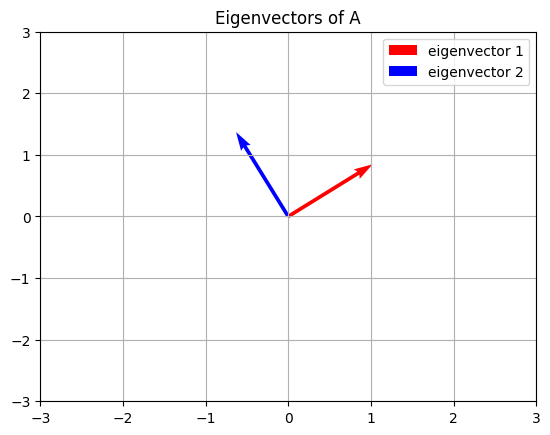

In [13]:
# Define a symmetric matrix
A = np.array([[4, 1], [1, 3]])
eigenvalues, eigenvectors = np.linalg.eig(A)
print('Eigenvalues:', eigenvalues)
print('Eigenvectors:\n', eigenvectors)

# Plot eigenvectors
origin = [0, 0]
plt.quiver(*origin, eigenvectors[0,0], eigenvectors[1,0], color='r', scale=5, label='eigenvector 1')
plt.quiver(*origin, eigenvectors[0,1], eigenvectors[1,1], color='b', scale=5, label='eigenvector 2')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('Eigenvectors of A')
plt.legend()
plt.grid()
plt.show()

#### 1.2.6.2 Example 2: Eigenvalues and Eigenvectors

Below is a GPT inspired, real-world example for eigenvalues and eigenvectors that comes from modal analysis in mechanical engineering. In this example, we consider a simple two-degree-of-freedom mass-spring system (two masses connected by springs and fixed at the ends). We construct the stiffness matrix
$K$ (and assume the mass matrix $M$ is the identity for simplicity), then compute the eigenvalues and eigenvectors. The eigenvalues correspond to the square of the natural frequencies, and the eigenvectors give the mode shapes (how the masses move relative to each other).

We then visualize the two mode shapes by representing the masses as points on a line and drawing arrows from these points to show the relative displacements for each mode. In one mode the masses move in phase, and in the other they move out of phase.

Eigenvalues (ω²): [4. 2.]
Natural frequencies (ω): [2.         1.41421356]
Mode shape 1: [ 0.70710678 -0.70710678]
Mode shape 2: [0.70710678 0.70710678]


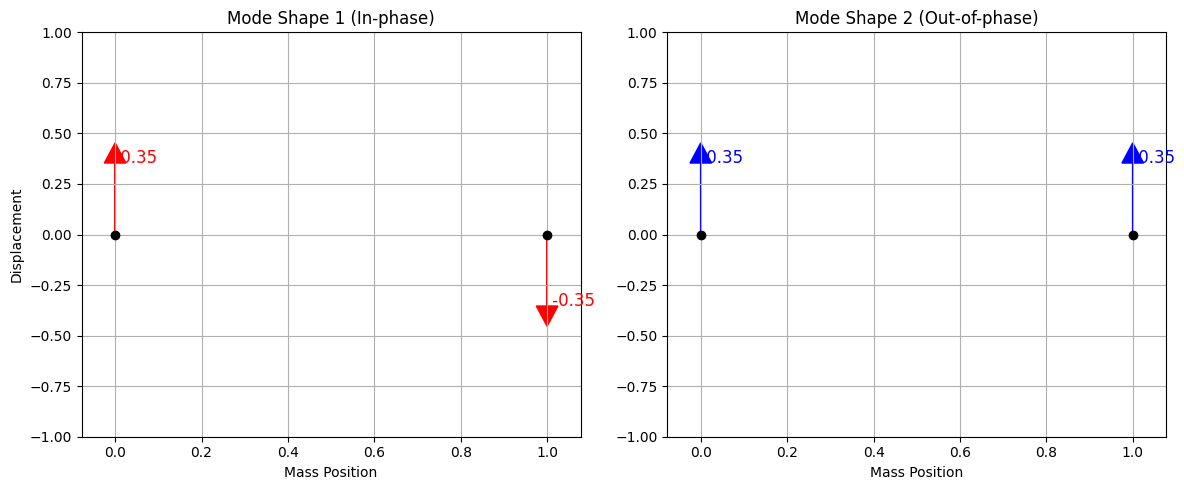

In [14]:
# System parameters for a 2 DOF mass-spring system
# Two masses (m1 and m2) are connected with springs to fixed supports and to each other.
m1 = 1.0
m2 = 1.0
# Spring constants: k1 connects mass1 to the left wall, k2 connects mass1 and mass2, k3 connects mass2 to the right wall.
k1 = 2.0
k2 = 1.0
k3 = 2.0

# For simplicity, assume mass matrix M = I.
M = np.array([[m1, 0],
              [0,  m2]])

# Stiffness matrix K for the system:
# K = [[k1 + k2,  -k2      ],
#      [ -k2   ,  k2 + k3 ]]
K = np.array([[k1 + k2, -k2],
              [-k2,      k2 + k3]])

# Solve the eigenvalue problem: K φ = λ M φ.
# Since M = I, this reduces to: K φ = λ φ.
eigenvalues, eigenvectors = np.linalg.eig(K)
natural_frequencies = np.sqrt(eigenvalues)  # ω = sqrt(λ)

print("Eigenvalues (ω²):", eigenvalues)
print("Natural frequencies (ω):", natural_frequencies)

# Normalize eigenvectors for clarity
mode1 = eigenvectors[:, 0] / np.linalg.norm(eigenvectors[:, 0])
mode2 = eigenvectors[:, 1] / np.linalg.norm(eigenvectors[:, 1])
print("Mode shape 1:", mode1)
print("Mode shape 2:", mode2)

# Visualization: assume the masses are located at x positions 0 and 1.
x_positions = [0, 1]
displacement_scale = 0.5  # scale factor for visualization

# Mode shape 1 visualization
mode1_disp = displacement_scale * mode1

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x_positions, [0, 0], 'ko')  # baseline for mass positions
for i, x in enumerate(x_positions):
    plt.arrow(x, 0, 0, mode1_disp[i], head_width=0.05, head_length=0.1, fc='r', ec='r')
plt.title("Mode Shape 1 (In-phase)")
plt.xlabel("Mass Position")
plt.ylabel("Displacement")
plt.ylim(-1, 1)
plt.grid(True)
plt.text(x_positions[0], mode1_disp[0], f" {mode1_disp[0]:.2f}", color='r', fontsize=12)
plt.text(x_positions[1], mode1_disp[1], f" {mode1_disp[1]:.2f}", color='r', fontsize=12)

# Mode shape 2 visualization
mode2_disp = displacement_scale * mode2
plt.subplot(1, 2, 2)
plt.plot(x_positions, [0, 0], 'ko')
for i, x in enumerate(x_positions):
    plt.arrow(x, 0, 0, mode2_disp[i], head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.title("Mode Shape 2 (Out-of-phase)")
plt.xlabel("Mass Position")
plt.ylim(-1, 1)
plt.grid(True)
plt.text(x_positions[0], mode2_disp[0], f" {mode2_disp[0]:.2f}", color='b', fontsize=12)
plt.text(x_positions[1], mode2_disp[1], f" {mode2_disp[1]:.2f}", color='b', fontsize=12)

plt.tight_layout()
plt.show()


# **1.3: Linear Regression**

The class text states that linear regression is used frequently in practical applications because of its simplicity. The models depend linearly on their unknown parameters and therefore are easier to fit than models which are non-linearly related to their parameters. As a result, the statistical properties of the resulting estimators are easier to determine.

### 1.3.1 QR Decomposition

The class text states that QR decomposition is a useful procedure to solve the linear least squares problem. First we use the Gram-Schmidt algorithm to obtain an orthonormal basis from a linearly independent set. The output of the Gram-Schimdt algorithm can then be written in a compact form, known as a QR
decomposition.

#### 1.3.1.1 Example 1: Basic QR Factorization

This example computes the QR factorization of a matrix and visualizes the Q matrix as a heatmap.

Q Matrix:
 [[-0.57735027  0.15430335]
 [-0.57735027 -0.77151675]
 [-0.57735027  0.6172134 ]]
R Matrix:
 [[-1.73205081 -1.15470054]
 [ 0.          2.1602469 ]]


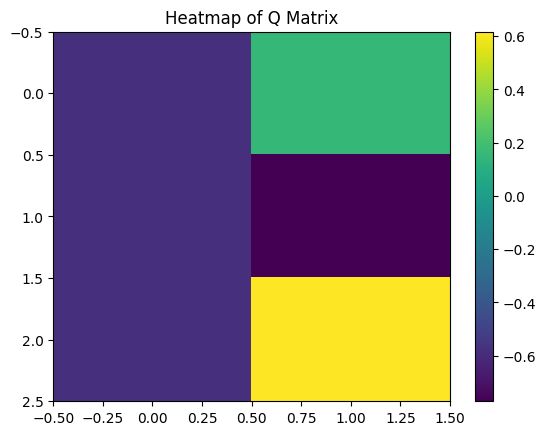

In [15]:
A = np.array([[1, 1], [1, -1], [1, 2]])
Q, R = np.linalg.qr(A)
print('Q Matrix:\n', Q)
print('R Matrix:\n', R)

# Visualize Q as a heatmap
plt.imshow(Q, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Heatmap of Q Matrix')
plt.show()

#### 1.3.1.2 Example 2: QR Decomposition in Regression Stability

This example solve a regression problem using QR decomposition and plots a simulated convergence of the solution.

Regression Solution using QR: [2. 1.]


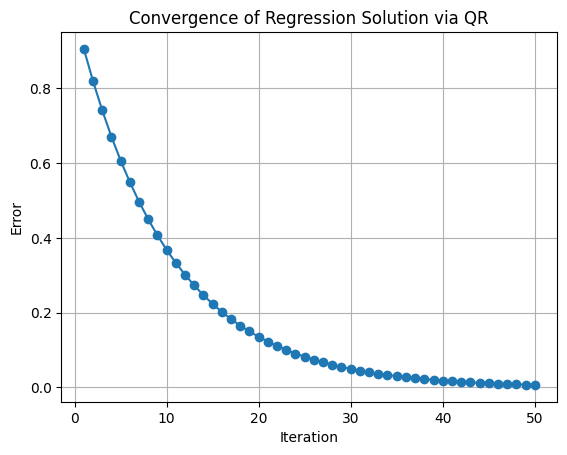

In [16]:
b = np.array([3, 1, 4])
x_qr = np.linalg.solve(R, Q.T @ b)
print('Regression Solution using QR:', x_qr)

# Simulate iterative convergence (dummy example)
iterations = np.linspace(1, 50, 50)
errors = np.exp(-iterations/10)
plt.plot(iterations, errors, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Convergence of Regression Solution via QR')
plt.grid()
plt.show()

### 1.3.2 Least-Squares Problems
Least-squares methods find the best-fit solution to an overdetermined system.

#### 1.3.2.1 Example 1: Solving an Overdetermined System

In this example we solve an overdetermined system using least squares and plot the residual errors.

Least Squares Solution: [2. 1.]


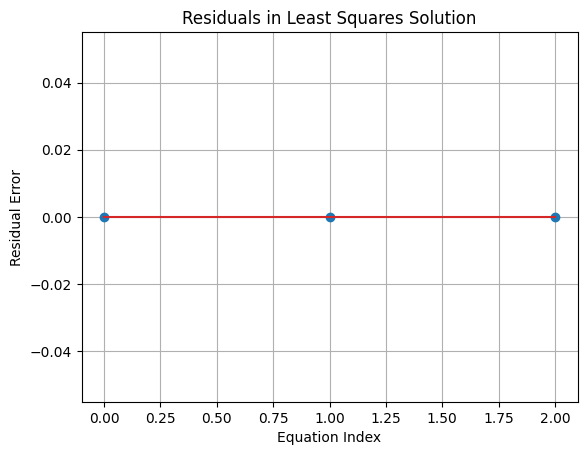

In [17]:
A = np.array([[1, 1], [1, -1], [1, 2]])
b = np.array([3, 1, 4])
x_ls, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)
print('Least Squares Solution:', x_ls)

# Plot residuals
residuals = np.abs(A.dot(x_ls) - b)
#plt.stem(range(len(residuals)), residuals, use_line_collection=True)
plt.stem(range(len(residuals)), residuals)

plt.xlabel('Equation Index')
plt.ylabel('Residual Error')
plt.title('Residuals in Least Squares Solution')
plt.grid()
plt.show()

#### 1.3.2.2 Example 2: Linear Trend Forecasting

This example simulates fitting a linear model to time series data and plotting the trend line along with the data points.

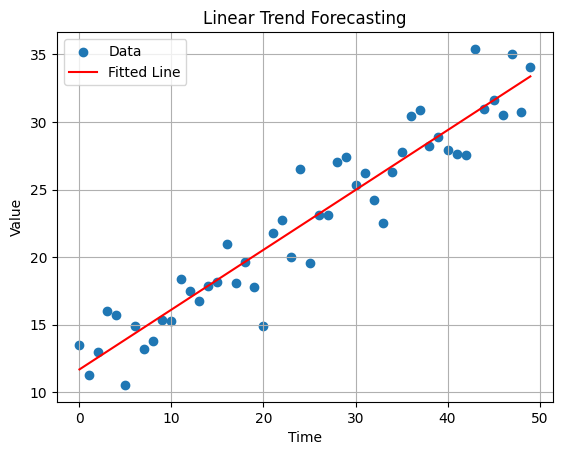

In [18]:
np.random.seed(0)
time = np.arange(0, 50)
data = 0.5 * time + 10 + np.random.randn(50) * 2

# Fit linear regression
A = np.vstack([time, np.ones(len(time))]).T
m, c = np.linalg.lstsq(A, data, rcond=None)[0]

plt.scatter(time, data, label='Data')
plt.plot(time, m*time + c, color='red', label='Fitted Line')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Linear Trend Forecasting')
plt.legend()
plt.grid()
plt.show()

### 1.3.3 Linear Regression

The class text points out that linear regression is an application of the least-squares problem we discuss in the last section.

#### 1.3.3.1 Example 1: Linear Regression via Normal Equations

This example solves a linear regression problem using normal equations and plots the regression line over the data.

Fitted model: y = 2.72x + 3.69


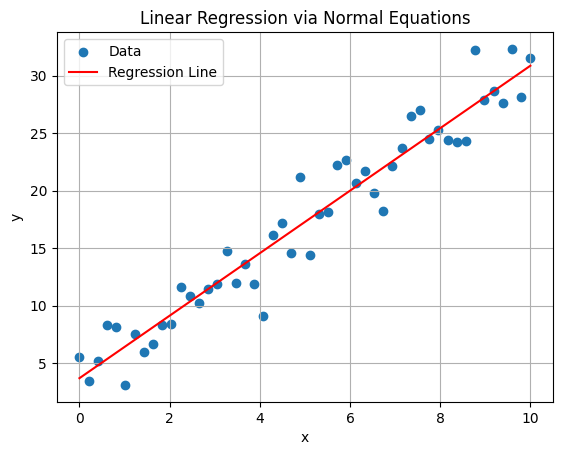

In [19]:
np.random.seed(0)
x = np.linspace(0, 10, 50)
y = 3*x + 2 + np.random.randn(50) * 2

# Solve using normal equations
A = np.vstack([x, np.ones(len(x))]).T
solution = np.linalg.solve(A.T @ A, A.T @ y)
m, c = solution
print('Fitted model: y = {:.2f}x + {:.2f}'.format(m, c))

# Plot data and regression line
plt.scatter(x, y, label='Data')
plt.plot(x, m*x + c, color='red', label='Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression via Normal Equations')
plt.legend()
plt.grid()
plt.show()

#### 1.3.3.2 Example 2: House Price Prediction

In this GPT inspired real-world example we perform linear regression on a synthetic dataset for house price prediction, and plot a scatter plot with the regression line.

House Price Model: price = 49.23*size + 0.70


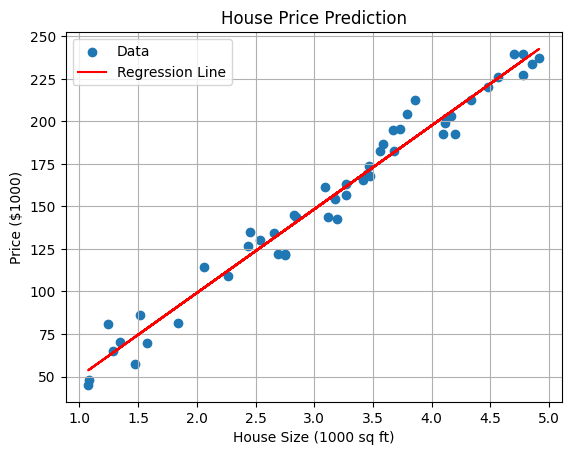

In [20]:
np.random.seed(0)
# Synthetic dataset: House size (in 1000 sq ft) vs. Price (in $1000)
size = np.random.uniform(1, 5, 50)
price = 50 * size + np.random.randn(50) * 10

# Prepare design matrix and solve using least squares
A = np.vstack([size, np.ones(len(size))]).T
solution = np.linalg.lstsq(A, price, rcond=None)[0]
m, c = solution
print('House Price Model: price = {:.2f}*size + {:.2f}'.format(m, c))

# Plot the data and regression line
plt.scatter(size, price, label='Data')
plt.plot(size, m*size + c, 'r-', label='Regression Line')
plt.xlabel('House Size (1000 sq ft)')
plt.ylabel('Price ($1000)')
plt.title('House Price Prediction')
plt.legend()
plt.grid()
plt.show()